In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [33]:
train = pd.read_csv("train.csv")
test_images = (pd.read_csv("test.csv").values).astype('float32')

In [34]:
train_images = (train.iloc[:, 1:].values).astype('float32')
train_labels = train['label'].values.astype('int32')

In [35]:
train_labels

array([1, 0, 1, ..., 7, 6, 9])

In [36]:
train_images.shape

(42000, 784)

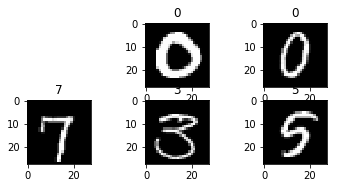

In [37]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)

for i in range(4,9):
    plt.subplot(330 + (i+1))
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.title(train_labels[i])

In [38]:
train_images = train_images.reshape((42000, 28 * 28))

In [39]:
train_labels

array([1, 0, 1, ..., 7, 6, 9])

In [40]:
train_images = train_images/255
test_images = test_images/255

In [41]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
num_classes = train_labels.shape[1]
num_classes

10

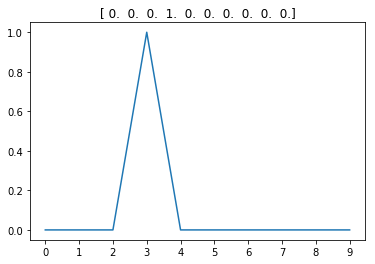

In [42]:
plt.title(train_labels[9])
plt.plot(train_labels[9])
plt.xticks(range(10));

In [43]:
seed = 43
np.random.seed(seed)

In [44]:
train_images.shape

(42000, 784)

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [47]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=(28*28)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [48]:
from keras.optimizers import RMSprop

In [49]:
model.compile(optimizer=RMSprop(lr=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [50]:
history=model.fit(train_images, train_labels, validation_split=0.05,
                 epochs=25, batch_size=64)

Train on 39900 samples, validate on 2100 samples
Epoch 1/25
39900/39900 [==============================] - 2s 53us/step - loss: 0.5153 - acc: 0.8477 - val_loss: 0.3027 - val_acc: 0.9195
Epoch 2/25
39900/39900 [==============================] - 2s 44us/step - loss: 0.2249 - acc: 0.9338 - val_loss: 0.2269 - val_acc: 0.9367
Epoch 3/25
39900/39900 [==============================] - 2s 40us/step - loss: 0.1801 - acc: 0.9474 - val_loss: 0.1983 - val_acc: 0.9467
Epoch 4/25
39900/39900 [==============================] - 2s 42us/step - loss: 0.1541 - acc: 0.9536 - val_loss: 0.1928 - val_acc: 0.9467
Epoch 5/25
39900/39900 [==============================] - 2s 39us/step - loss: 0.1367 - acc: 0.9591 - val_loss: 0.1631 - val_acc: 0.9538
Epoch 6/25
39900/39900 [==============================] - 2s 39us/step - loss: 0.1220 - acc: 0.9636 - val_loss: 0.1634 - val_acc: 0.9557
Epoch 7/25
39900/39900 [==============================] - 2s 38us/step - loss: 0.1104 - acc: 0.9663 - val_loss: 0.1545 - val_acc:

In [51]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [52]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

In [53]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

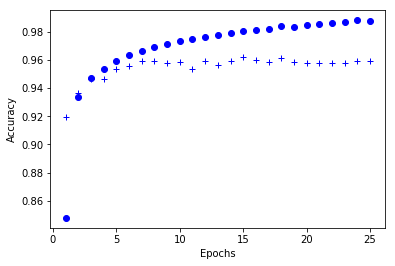

In [54]:
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [55]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=(28*28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=15, batch_size=64)

Epoch 1/15
42000/42000 [==============================] - 3s 73us/step - loss: 1.1874 - acc: 0.6653
Epoch 2/15
42000/42000 [==============================] - 3s 70us/step - loss: 0.4764 - acc: 0.8579
Epoch 3/15
42000/42000 [==============================] - 2s 59us/step - loss: 0.3563 - acc: 0.8947
Epoch 4/15
42000/42000 [==============================] - 3s 64us/step - loss: 0.2979 - acc: 0.9117
Epoch 5/15
42000/42000 [==============================] - 3s 68us/step - loss: 0.2636 - acc: 0.9224
Epoch 6/15
42000/42000 [==============================] - 3s 67us/step - loss: 0.2365 - acc: 0.9307
Epoch 7/15
42000/42000 [==============================] - 3s 65us/step - loss: 0.2139 - acc: 0.9370
Epoch 8/15
42000/42000 [==============================] - 3s 66us/step - loss: 0.1988 - acc: 0.9408
Epoch 9/15
42000/42000 [==============================] - 3s 65us/step - loss: 0.1824 - acc: 0.9459
Epoch 10/15
42000/42000 [==============================] - 3s 66us/step - loss: 0.1710 - acc: 0.9479

In [56]:
predictions = model.predict_classes(test_images, verbose=0)
submissions=pd.DataFrame({'ImageId':list(range(1,len(predictions) + 1)), "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)